In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

In [4]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [5]:
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())
print(df['Fuel_Type'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]
['Petrol' 'Diesel' 'CNG']


In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [8]:
final_datasets = df.drop('Car_Name',axis=1)

In [9]:
final_datasets.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [10]:
final_datasets['num_of_years'] = final_datasets.Year.apply(lambda x: 2020-x)

In [11]:
final_datasets.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,num_of_years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [12]:
final_datasets.drop('Year',inplace=True,axis=1)
final_datasets.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,num_of_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [13]:
final_datasets = pd.get_dummies(final_datasets,drop_first=True)
final_datasets.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,num_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [14]:
final_datasets.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,num_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
num_of_years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [15]:
import seaborn as sns

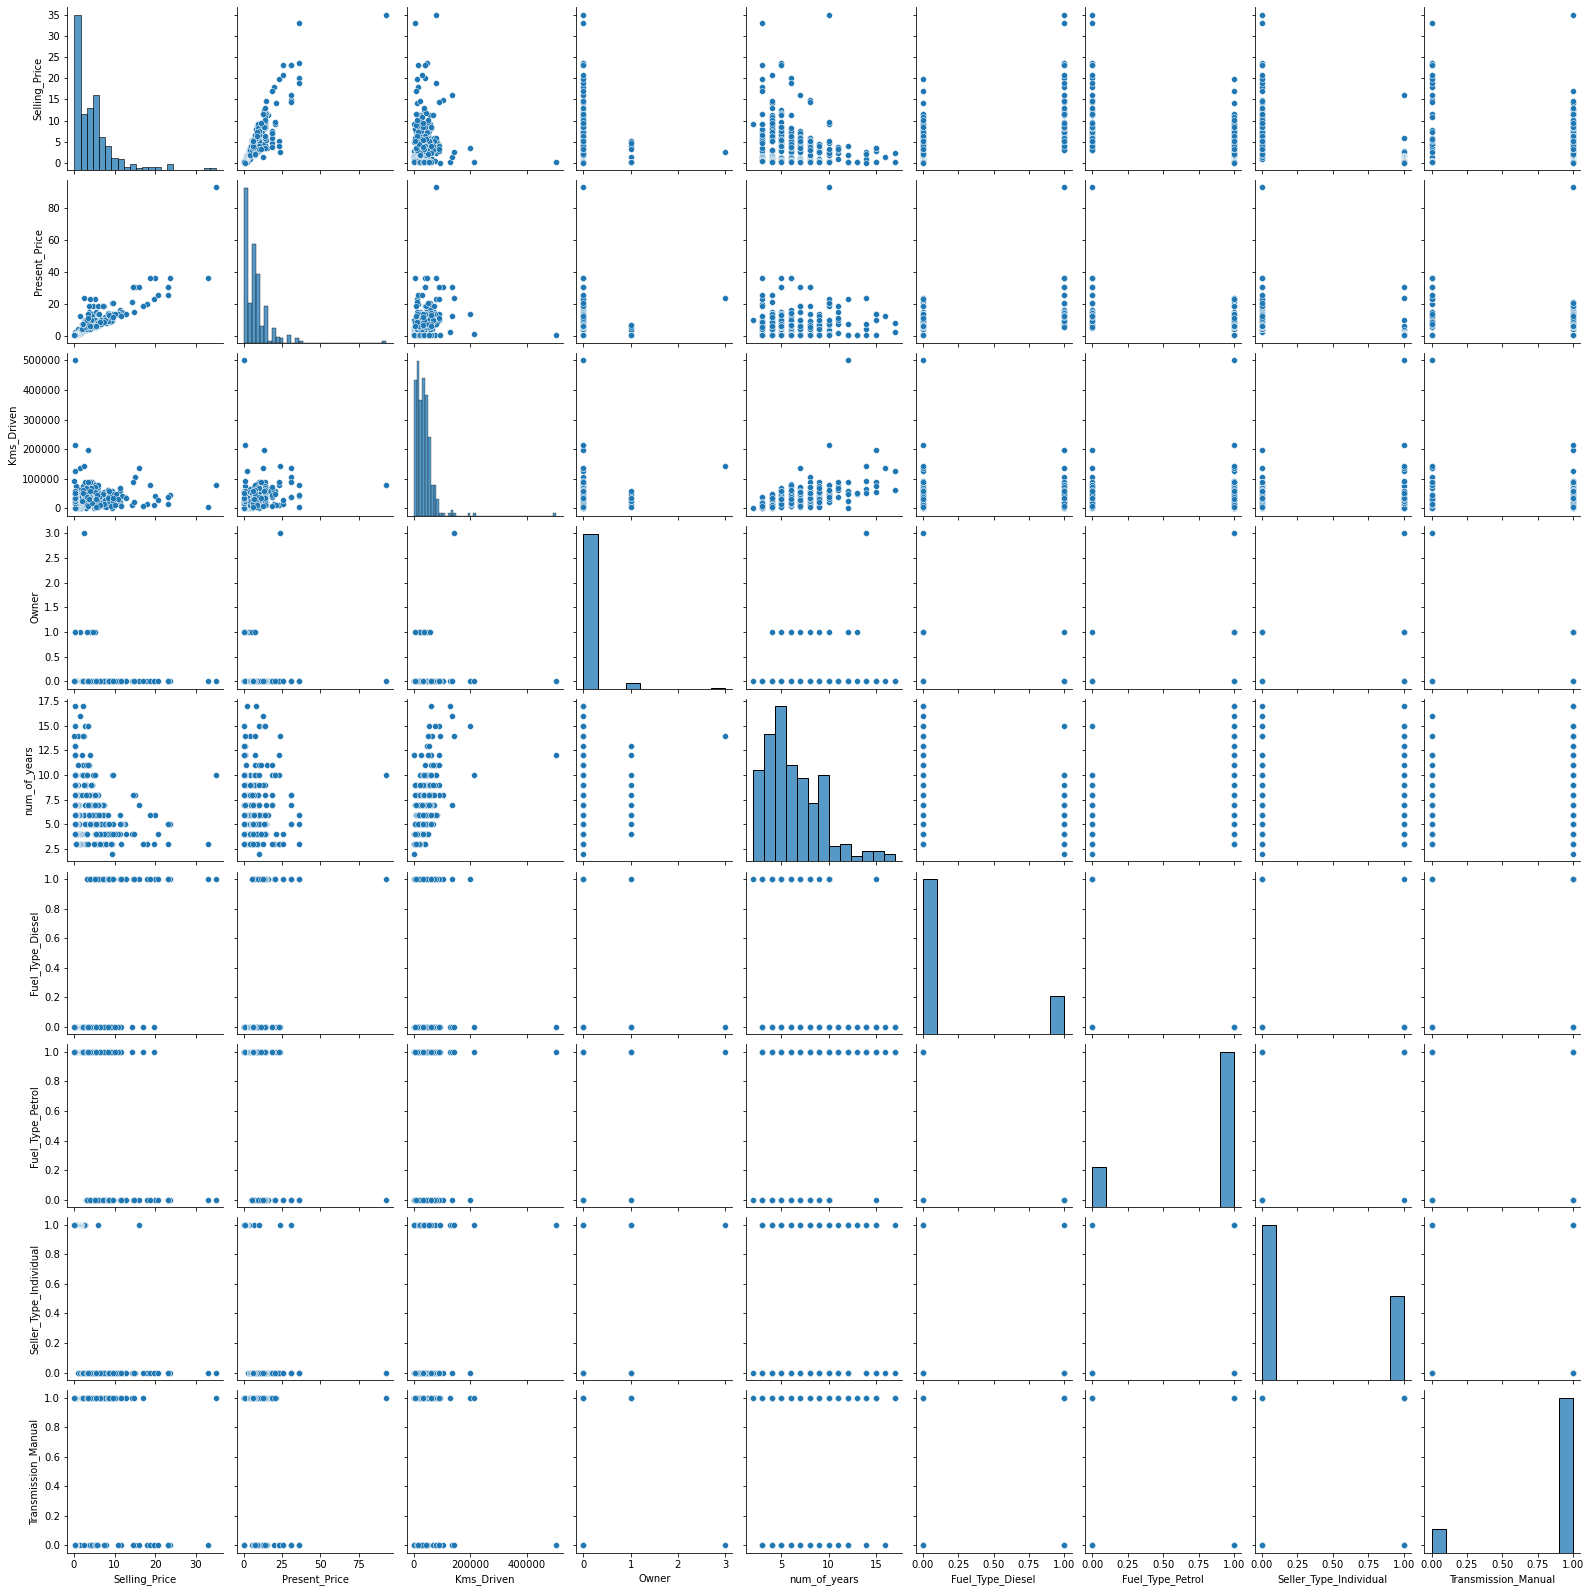

In [16]:
sns.pairplot(final_datasets,kind='scatter')

<AxesSubplot:>

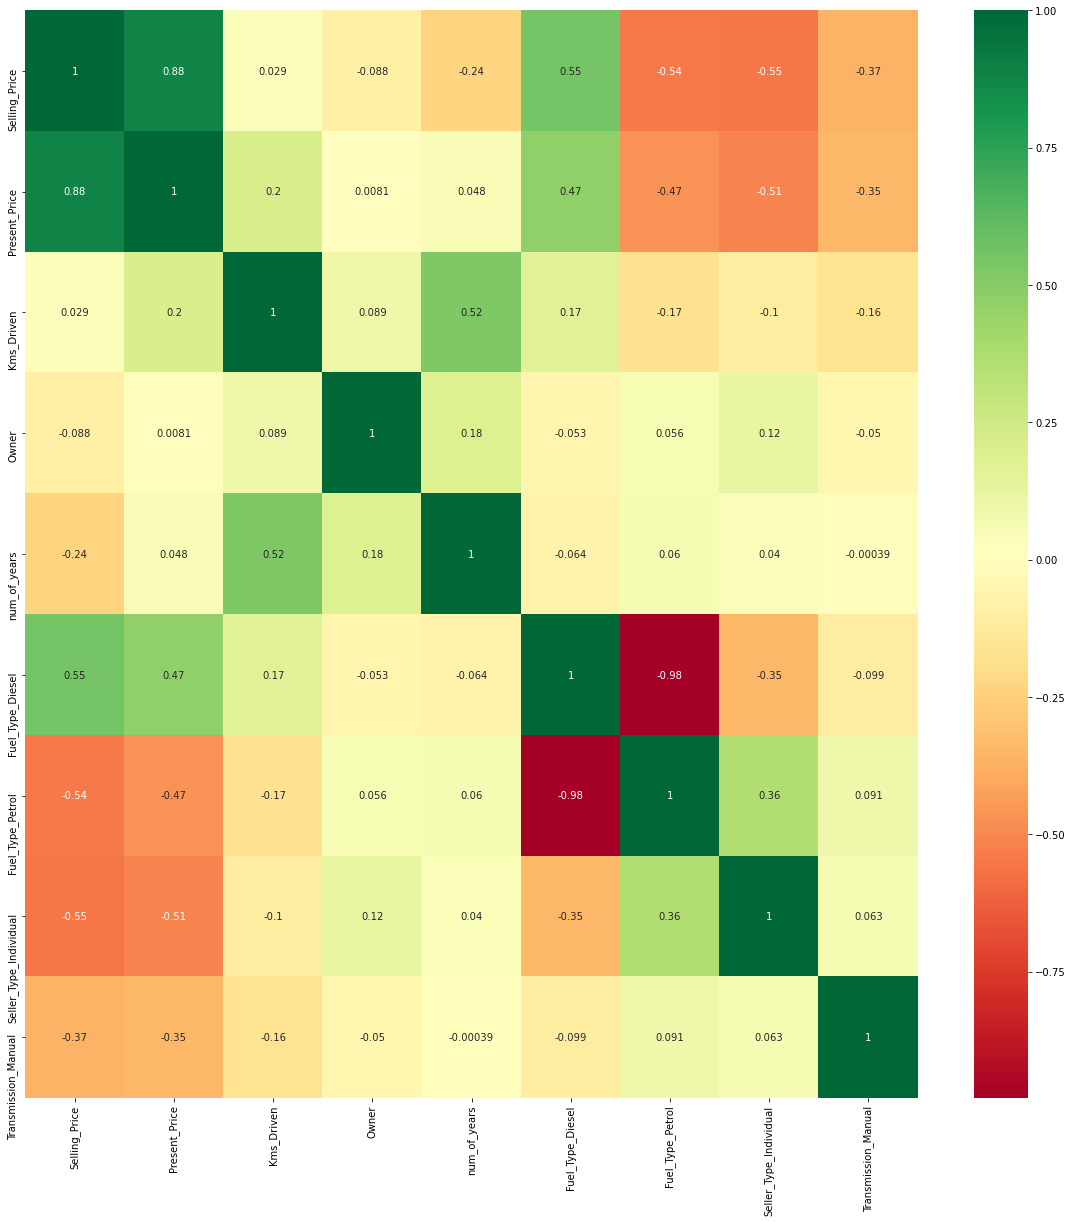

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,20))
sns.heatmap(final_datasets.corr(),annot=True,cmap='RdYlGn')

In [18]:
final_datasets.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,num_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [19]:
X = final_datasets.iloc[:,1:]
y = final_datasets.Selling_Price

In [20]:
# To extract top five features

from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
print(model.fit(X,y))

ExtraTreesRegressor()


In [21]:
model.feature_importances_

array([0.37357334, 0.04028152, 0.00133045, 0.07671941, 0.22347459,
       0.01310841, 0.1310919 , 0.14042038])

<AxesSubplot:>

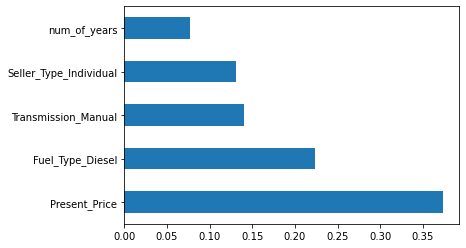

In [22]:
feat_importances = pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [24]:
X_train.shape

(210, 8)

In [25]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [26]:
####Hyperparameters 
import numpy as np
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]
n_estimators

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]

In [27]:
# no of Decision trees in Random Forrest
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]
# no of feature to consider at every split
max_features = ['auto','sqrt']
#Maximum no of levels in the trees
max_depth = [int(x) for x in np.linspace(start=5,stop=30,num=6)]
#min no of samples required to split a node
min_samples_split = [1,2,5,10]   
#minimum no of samples reuired at each leaf node
min_samples_leaf = [1,2,5,10]   

In [28]:
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_leaf':min_samples_leaf,
             'min_samples_split':min_samples_split}
print(param_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_leaf': [1, 2, 5, 10], 'min_samples_split': [1, 2, 5, 10]}


In [29]:
from sklearn.model_selection import RandomizedSearchCV 
rcv = RandomizedSearchCV(estimator=rf,param_distributions=param_grid,n_iter=10,scoring='neg_mean_squared_error',cv=5,
                        verbose=2,random_state=42,n_jobs=1)

In [30]:
rcv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=15 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=15, total=   1.0s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=15 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=15, total=   1.0s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=15, total=   1.0s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=15, total=   1.0s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=15, total=   1.0s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=20 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=20, total=   1.2s
[CV] n_estimators=1100, min_samples_split

C:\Users\dasssvis\AppData\Local\Continuum\anaconda3\envs\vishal_env\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dasssvis\AppData\Local\Continuum\anaconda3\envs\vishal_env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dasssvis\AppData\Local\Continuum\anaconda3\envs\vishal_env\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\dasssvis\AppData\Local\Continuum\anaconda3\envs\vishal_env\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\dasssvis\AppData\Local\Continuum\anaconda3\envs\vishal_env\lib\site-packages\joblib\parallel.py", line 847, in dispatch_

[CV]  n_estimators=700, min_samples_split=1, min_samples_leaf=5, max_features=auto, max_depth=25, total=   0.2s
[CV] n_estimators=700, min_samples_split=1, min_samples_leaf=5, max_features=auto, max_depth=25 


C:\Users\dasssvis\AppData\Local\Continuum\anaconda3\envs\vishal_env\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dasssvis\AppData\Local\Continuum\anaconda3\envs\vishal_env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dasssvis\AppData\Local\Continuum\anaconda3\envs\vishal_env\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\dasssvis\AppData\Local\Continuum\anaconda3\envs\vishal_env\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\dasssvis\AppData\Local\Continuum\anaconda3\envs\vishal_env\lib\site-packages\joblib\parallel.py", line 847, in dispatch_

[CV]  n_estimators=700, min_samples_split=1, min_samples_leaf=5, max_features=auto, max_depth=25, total=   0.2s
[CV] n_estimators=700, min_samples_split=1, min_samples_leaf=5, max_features=auto, max_depth=25 


C:\Users\dasssvis\AppData\Local\Continuum\anaconda3\envs\vishal_env\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dasssvis\AppData\Local\Continuum\anaconda3\envs\vishal_env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dasssvis\AppData\Local\Continuum\anaconda3\envs\vishal_env\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\dasssvis\AppData\Local\Continuum\anaconda3\envs\vishal_env\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\dasssvis\AppData\Local\Continuum\anaconda3\envs\vishal_env\lib\site-packages\joblib\parallel.py", line 847, in dispatch_

[CV]  n_estimators=700, min_samples_split=1, min_samples_leaf=5, max_features=auto, max_depth=25, total=   0.3s
[CV] n_estimators=700, min_samples_split=1, min_samples_leaf=5, max_features=auto, max_depth=25 


C:\Users\dasssvis\AppData\Local\Continuum\anaconda3\envs\vishal_env\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dasssvis\AppData\Local\Continuum\anaconda3\envs\vishal_env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dasssvis\AppData\Local\Continuum\anaconda3\envs\vishal_env\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\dasssvis\AppData\Local\Continuum\anaconda3\envs\vishal_env\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\dasssvis\AppData\Local\Continuum\anaconda3\envs\vishal_env\lib\site-packages\joblib\parallel.py", line 847, in dispatch_

[CV]  n_estimators=700, min_samples_split=1, min_samples_leaf=5, max_features=auto, max_depth=25, total=   0.3s
[CV] n_estimators=700, min_samples_split=1, min_samples_leaf=5, max_features=auto, max_depth=25 


C:\Users\dasssvis\AppData\Local\Continuum\anaconda3\envs\vishal_env\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dasssvis\AppData\Local\Continuum\anaconda3\envs\vishal_env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dasssvis\AppData\Local\Continuum\anaconda3\envs\vishal_env\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\dasssvis\AppData\Local\Continuum\anaconda3\envs\vishal_env\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\dasssvis\AppData\Local\Continuum\anaconda3\envs\vishal_env\lib\site-packages\joblib\parallel.py", line 847, in dispatch_

[CV]  n_estimators=700, min_samples_split=1, min_samples_leaf=5, max_features=auto, max_depth=25, total=   0.3s
[CV] n_estimators=1000, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=30 


C:\Users\dasssvis\AppData\Local\Continuum\anaconda3\envs\vishal_env\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dasssvis\AppData\Local\Continuum\anaconda3\envs\vishal_env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dasssvis\AppData\Local\Continuum\anaconda3\envs\vishal_env\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\dasssvis\AppData\Local\Continuum\anaconda3\envs\vishal_env\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\dasssvis\AppData\Local\Continuum\anaconda3\envs\vishal_env\lib\site-packages\joblib\parallel.py", line 847, in dispatch_

[CV]  n_estimators=1000, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   0.4s
[CV] n_estimators=1000, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=30 


C:\Users\dasssvis\AppData\Local\Continuum\anaconda3\envs\vishal_env\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dasssvis\AppData\Local\Continuum\anaconda3\envs\vishal_env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dasssvis\AppData\Local\Continuum\anaconda3\envs\vishal_env\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\dasssvis\AppData\Local\Continuum\anaconda3\envs\vishal_env\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\dasssvis\AppData\Local\Continuum\anaconda3\envs\vishal_env\lib\site-packages\joblib\parallel.py", line 847, in dispatch_

[CV]  n_estimators=1000, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   0.5s
[CV] n_estimators=1000, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=30 


C:\Users\dasssvis\AppData\Local\Continuum\anaconda3\envs\vishal_env\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dasssvis\AppData\Local\Continuum\anaconda3\envs\vishal_env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dasssvis\AppData\Local\Continuum\anaconda3\envs\vishal_env\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\dasssvis\AppData\Local\Continuum\anaconda3\envs\vishal_env\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\dasssvis\AppData\Local\Continuum\anaconda3\envs\vishal_env\lib\site-packages\joblib\parallel.py", line 847, in dispatch_

[CV]  n_estimators=1000, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   0.5s
[CV] n_estimators=1000, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=30 


C:\Users\dasssvis\AppData\Local\Continuum\anaconda3\envs\vishal_env\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dasssvis\AppData\Local\Continuum\anaconda3\envs\vishal_env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dasssvis\AppData\Local\Continuum\anaconda3\envs\vishal_env\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\dasssvis\AppData\Local\Continuum\anaconda3\envs\vishal_env\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\dasssvis\AppData\Local\Continuum\anaconda3\envs\vishal_env\lib\site-packages\joblib\parallel.py", line 847, in dispatch_

[CV]  n_estimators=1000, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   0.4s
[CV] n_estimators=1000, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=30 


C:\Users\dasssvis\AppData\Local\Continuum\anaconda3\envs\vishal_env\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dasssvis\AppData\Local\Continuum\anaconda3\envs\vishal_env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dasssvis\AppData\Local\Continuum\anaconda3\envs\vishal_env\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\dasssvis\AppData\Local\Continuum\anaconda3\envs\vishal_env\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\dasssvis\AppData\Local\Continuum\anaconda3\envs\vishal_env\lib\site-packages\joblib\parallel.py", line 847, in dispatch_

[CV]  n_estimators=1000, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   0.4s
[CV] n_estimators=1100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=1100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10, total=   1.5s
[CV] n_estimators=1100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=1100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10, total=   1.3s
[CV] n_estimators=1100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=1100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10, total=   1.4s
[CV] n_estimators=1100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=1100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10, total=   1.4s
[CV] n_estimators=1100, min_samples_split=5

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   34.7s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [1, 2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [31]:
rcv.best_params_

{'n_estimators': 1100,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 10}

In [32]:
predictions = rcv.predict(X_test)
predictions

array([ 7.84403387,  0.26925977,  0.19110948,  6.51413772,  0.51409377,
        3.75489801,  0.50229535,  1.0183715 ,  6.11367138,  1.19914447,
        1.03583339,  7.1155618 ,  5.02495223,  7.92773622,  0.58747346,
       11.68076376,  2.99802333,  0.73434538,  1.36726054,  5.30273901,
        0.58050489,  6.72160863, 16.20680007,  0.67609722,  4.41730357,
        4.74150025,  1.12033956,  7.5384689 ,  7.56274942,  7.86105418,
        9.25230942,  0.59608768,  5.03246561,  2.35829261,  0.73140922,
        3.01314915,  4.77905341,  2.94979405,  0.3046669 ,  4.84989387,
        4.40672113, 22.17548481,  1.60267702,  0.82991151,  1.25804927,
        4.33826031,  2.09722708,  0.49798721,  7.54185389,  4.71680537,
        5.09317737,  7.18388296,  0.65380202,  5.01897754,  4.01800035,
        2.34536929,  0.6761766 ,  2.64918285,  4.88165023,  0.44745425,
       17.68797598,  0.53528221,  6.76431993,  0.17034557, 12.04791946,
        3.41078128,  0.46497663,  0.44643921,  4.84241522,  3.24

C:\Users\dasssvis\AppData\Local\Continuum\anaconda3\envs\vishal_env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

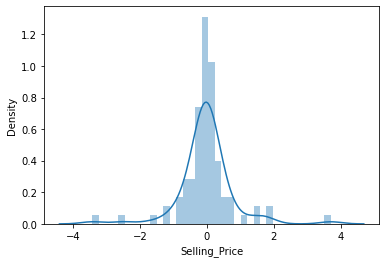

In [33]:
sns.distplot(y_test- predictions,)

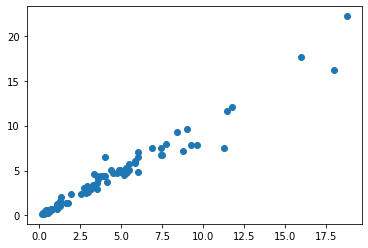

In [34]:
plt.scatter(y_test,predictions)

In [35]:
import pickle 
#open a file where you want to store the data
file = open('random_forest_regression_model.pkl','wb')

#dump information to that file 
pickle.dump(rcv,file)